#Lending CLub Case Study

# Lending Club Case Study

Group Members: 

<b>1. Sameep Mishra (Group Facilitator)</b>
<b>2. Saurav Ujjain (Group Member)</b>

## Project Brief (Problem Statement)

We analyze the historical loan data of a large online loan marketplace specializing in lending various kind of loans to urban customers. The objective of the analysis is to:

1. Identify the driving factors behind loan defaults
2. Identify and recommend safe loan candidates so the company doesnt incur business loss by NOT lending to those candidates.

## Analysis Approach

1. <b>Data Understanding</b> - 
Identify quality issues , Interpret the correct meaning of vairables (Columns)


2. <b>Data Cleaning and Manipulation </b> - 
Data (like strings and dates) are corrected to the right type to facilitate analysis , Empty (Null) value columns and variables are removed


3. <b>Data Analysis </b> - 

    a. Use <i>univariate and Segmented Univariate analysis </i>to identify atleast 5 drivers (Indicators) of defaults
    
    b. Create new <i>Derrived metrics</i> wherever needed (whether business driven, Type driven or Data driven) to get  new maningful business insights
    
    c.<i>Bivariate and Multivariate analysis</i> are done to understand combination of loan default and loan success drivers which makes business sense.
    
    Also <i>Plot appropriate graphs</i> with to present the results of the above types of analysis and to make it easy to draw clear insights.
    
    
4. <b>Presentation and Recommendations </b> - 
A summary of the full analysis is created in a presentation format , explaining the insgihts drawn towards the default drivers and busines loss drivers with clear actionable suggestions for improvement in default reduction and slection of better loan canditates.



### Load the Python libraries

In [1]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from matplotlib import style # to import all styles 


### Importing the raw data

In [3]:
#Importing the data
RawData = pd.read_csv("loan.csv", low_memory=False)

In [4]:
#To View the outlook of the imported raw data
RawData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
RawData.shape # Chekcing the shape to get the total rows and columns

(39717, 111)

## Data Cleaning

### Drop all the blank columns 

In [6]:
#Lets remove all the up blank colums

RawData.dropna(how='all', axis=1, inplace=True)

#Increase the display windows size
RawData.shape

(39717, 57)

We can see that out of 111 comluns in the raw data, only 57 remains after we removed the columns with no data

### Finding columns with more than 50% of values as NULL

In [7]:
# Check the number of Null values in each of the columns by dividing sum of null values with total number of rows
NullPercent=round(((RawData.isnull().sum())/len(RawData.id))*100)
#Check the fileds with more than 
print(NullPercent[NullPercent>50])

mths_since_last_delinq    65.0
mths_since_last_record    93.0
next_pymnt_d              97.0
dtype: float64


<b>We can safely delete the three columns with > 50% NAN values </b>

In [8]:
DroppingColumns=list(NullPercent[NullPercent > 50].index) # variable to store columns to be dropped
RawData=RawData.drop(DroppingColumns,axis=1) #Dropping columns

In [9]:
#Lets look athe rows and columns now
RawData.shape

(39717, 54)

As we can see, there are total 54 Columns left in the data set. Lets try and find how many unique values are in these columns for further filtering

In [10]:
RawData.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

## Insights from looking at Unique values

1. We can delete all the columns with just 1 (Unique) value as they would not add any value in analysis.
2. 'URL', 'member_id' and 'id' are all unique identifiers for the customers, and we will only need one for any analysis. so let's keep 'id' and remove the other two.

In [11]:
drop_unique_redundant_columns= ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','initial_list_status','collections_12_mths_ex_med','pymnt_plan','url','member_id']
RawData=RawData.drop(drop_unique_redundant_columns,axis=1) #Dropping columns

In [12]:
#get the new rows and columns detail
RawData.shape

(39717, 43)

In [13]:
#Lets look the remaining columns and data
pd.set_option('display.max_columns', None)
RawData.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


# Insights from looking at the column descriptions and the data:

1. 'funded_amnt' & 'funded_amnt_inv' : They are basically same as 'Loan_amnt' so we can get of them without impacting analysis.

2. 'desc': Loan details provided by borrower. It has incomplete and unlcear data. Can be removed

3. 'title' : The loan title provided by the borrower. This has very arbitrary unique string entires . Lets discard

4. 'zip_code': Incomplete data of Zip code. Too many unique values to be useful for any unordered segmneted analysis. Let's discard

5. 'out_prncp' & 'out_prncp_inv': Remaining outstanding principal for portion of total amount funded by investors, They are mostly same. Lets delete 'out_prncp_inv'

6. 'total_pymnt' & 'total_pymnt_inv' : Payments received to date for total amount funded/ funded by investor, are mostly same. Let's delete 'total_pymnt_inv'

7. 'collection_recovery_fee' : post charge off collection fee, not releavnt to our analysis. Discard.

8. 'last_credit_pull_d': The most recent month LC pulled credit for this loan. Not very relevant to analysis. Discard.





In [14]:
#Deleting the columns identoified above as unneeded for the analysis
drop_more_columns= ['funded_amnt','funded_amnt_inv','desc','title','zip_code','out_prncp_inv','total_pymnt_inv','collection_recovery_fee','last_credit_pull_d']
RawData=RawData.drop(drop_more_columns, axis=1)

In [15]:
# Let's save the clean dataframe in a new variable name
cleanData=RawData

In [16]:
#confirm the shape of the new dataframe
cleanData.shape

(39717, 34)

## Data correction 

1. 'pub_rec_bankruptcies': 'Reported public bankrupties' has null values which should can be assumed to be 0 to draw useful insights.
2. 'emp_length': Column has multiple inconsitencies like use of string'year', '10+' and 's' which need to be changed  and corrected , so the column will have just int value and can be used to do analysis 
3. 'int_rate' & 'revol_util columns' need correction to make them suable as a numerical variable .
4. Blank values in 'emp_title' can be replaced with unknown to draw some segmented bivariate analyses.

In [17]:
# Updating column values from text to numbers

## Removing Months from term column
cleanData['term'] = (cleanData['term'].replace({'months':''}, regex=True))

## Removing non number charactors from emp_length column
#RawData_Current_filter['emp_length'] = RawData_Current_filter['emp_length'].replace({'10+':'10.5'},regex=True)
cleanData['emp_length'] = cleanData['emp_length'].replace({'< 1':'0.5'},regex=True)
cleanData['emp_length'] = cleanData['emp_length'].replace({'year':''},regex=True)
cleanData['emp_length'] = cleanData['emp_length'].replace({'s':''},regex=True)


## Removing non number charactors from int_rate & revol_util columns and change to int type
cleanData['int_rate'] = cleanData['int_rate'].apply(lambda x: float(x.rstrip('%')))

cleanData['revol_util'] = cleanData['revol_util'].replace({'%':''},regex=True)

## changing 'NONE' entry in 'home_ownership' with 'OTHER'
cleanData['home_ownership'] = cleanData['home_ownership'].replace({'NONE':'OTHER'},regex=True)

## Replacing Blank employer name value with Unknown
cleanData['emp_title'] = cleanData['emp_title'].replace(np.nan, 'Unknown')

## Replacing NAN value for public bankrupcties with 0 bankrupcties
cleanData['pub_rec_bankruptcies'] = cleanData['pub_rec_bankruptcies'].replace(np.nan, 0)

In [18]:
#lets look at all the columns in the new dataframe
cleanData.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

#### It can also be inferred that looking at the Loan_Status Column, only the 'Fully Paid'  and 'charged off' loans are relevant to analysis. So we can delete all the rows with 'current' loans and move ahead 

In [19]:
cleanData=cleanData[~(cleanData['loan_status'] == 'Current')]

In [20]:
#Let's have a look at the clean data
pd.set_option('display.max_columns', None)
cleanData.head(5)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,36,10.65,162.87,B,B2,Unknown,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,5863.155187,5000.00,863.16,0.00,0.00,Jan-15,171.62,0.0
1,1077430,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,1008.710000,456.46,435.17,0.00,117.08,Apr-13,119.66,0.0
2,1077175,2400,36,15.96,84.33,C,C5,Unknown,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,3005.666844,2400.00,605.67,0.00,0.00,Jun-14,649.91,0.0
3,1076863,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,12231.890000,10000.00,2214.92,16.97,0.00,Jan-15,357.48,0.0
5,1075269,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0,5632.210000,5000.00,632.21,0.00,0.00,Jan-15,161.03,0.0


In [21]:
# checking null values data types of the cleaned database
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  float64
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_title             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

# Univariate analysis

In [22]:
plt.rcParams["figure.figsize"]=20,20 #This to increase the visual output screensize.

### Let's look in to box plots of 'Loan Amount', Interest Rate', 'EMI' and 'Annual Income' to undertsand the interquartile range and median values of these variables 

Text(0.5, 0, 'Loan_Amount')

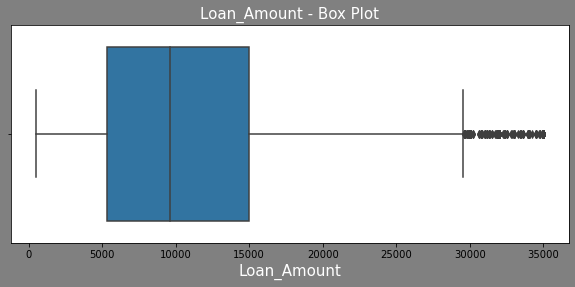

In [23]:
plt.figure(figsize=(10,4),facecolor='grey')

loan_amount_b_plot = sns.boxplot(x=cleanData['loan_amnt'])
loan_amount_b_plot.set_title('Loan_Amount - Box Plot',fontsize=15,color='w')
loan_amount_b_plot.set_xlabel('Loan_Amount',fontsize=15,color='w')

#### Insights:
We can see the majority of loans issued are in the range of USD 5000 and USD 15000 with the median loan amount a little less than USD 10,000

Text(0.5, 0, 'Interest Rate')

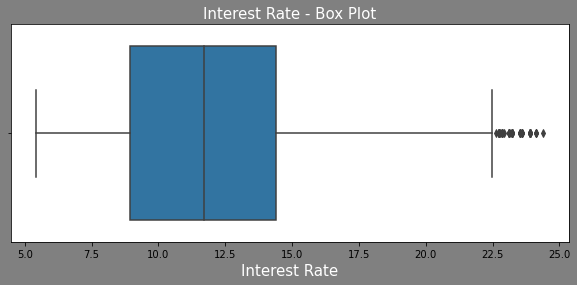

In [24]:
plt.figure(figsize=(10,4),facecolor='grey')

int_rate_b_Plot = sns.boxplot(x=cleanData['int_rate'])
int_rate_b_Plot.set_title('Interest Rate - Box Plot',fontsize=15,color='w')
int_rate_b_Plot.set_xlabel('Interest Rate',fontsize=15,color='w')

#### Insights:
We can see the majority of interest rates (Inter quartile range) issued are in the range of 9% to 15% and the median rate is at 12%

Text(0.5, 0, 'installment')

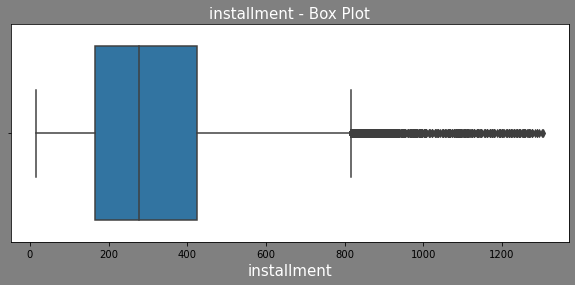

In [25]:
plt.figure(figsize=(10,4),facecolor='grey')

installment_b_Plot = sns.boxplot(x=cleanData['installment'])
installment_b_Plot.set_title('installment - Box Plot',fontsize=15,color='w')
installment_b_Plot.set_xlabel('installment',fontsize=15,color='w')

#### Insights:
We can see the majority of iinstallments(Inter quartile range) fall in the range of USD 200 to USD 400 range and the median rate is around USD 250

Text(0.5, 0, 'annual_income')

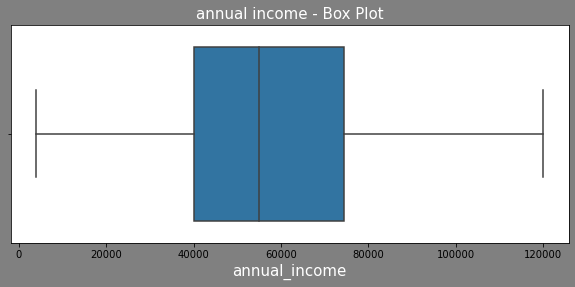

In [26]:
plt.figure(figsize=(10,4),facecolor='grey')

annual_inc_b_Plot = sns.boxplot(x=cleanData[(cleanData['annual_inc'] < 120000.0)]['annual_inc'])
#Getting rid of income outlier at greater than USD 120000
annual_inc_b_Plot.set_title('annual income - Box Plot',fontsize=15,color='w')
annual_inc_b_Plot.set_xlabel('annual_income',fontsize=15,color='w')

#### Insights:
We can see the majority of yearly income(Inter quartile range) fall in the range of USD 40000 to USD 70000 range and the median income is around USD 55000

# Univariate Analysis on Loan Status (Unordered Categorical variable)

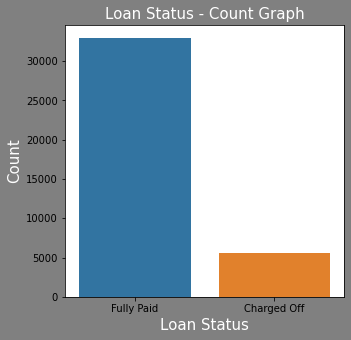

In [27]:
# Univariate Analysis on Loan Status (Unordered Categorical variable)
#PLotting Loan status against the number of laons in bar chart

plt.figure(figsize=(5,5),facecolor='grey')

loanStatusCountPlot = sns.countplot(x = 'loan_status', data=cleanData)
loanStatusCountPlot.set_title('Loan Status - Count Graph',fontsize=15,color='w')
loanStatusCountPlot.set_xlabel('Loan Status',fontsize=15,color='w')
loanStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


### As we can observe from the above graph and data below, approximately 15% of total loans are charged off.

## Univariate Analysis on Loan Grade

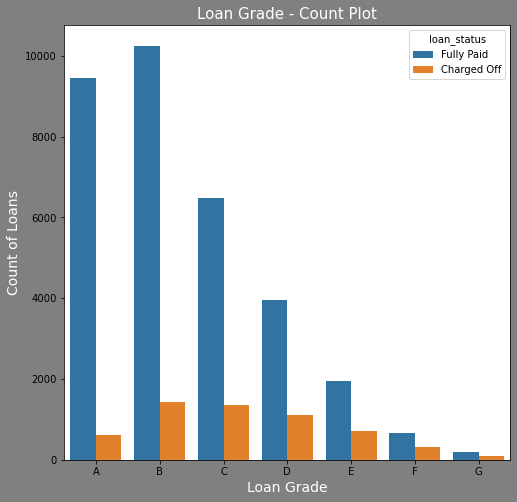

In [28]:
plt.figure(figsize=(8,8),facecolor='grey')

gradeCountPlot = sns.countplot(x = 'grade', data=cleanData, hue='loan_status', order = 'ABCDEFG')
gradeCountPlot.set_title('Loan Grade - Count Plot',fontsize=15,color='w')
gradeCountPlot.set_xlabel('Loan Grade',fontsize=14,color='w')
gradeCountPlot.set_ylabel('Count of Loans',fontsize=14,color='w')

plt.show()

#### Insights:
Absolute rate of Default is almost same for Grade B and C.  Although we can see that a relatively higher ratio of Grade C (approx 15%) of total loans are being charged off compared to  (approx 10%) grade A loans. Though it is clear that the default rate is much worse as the grade of loan goes lesser with almost half (50%) of Grade E,F and G loans going into default.

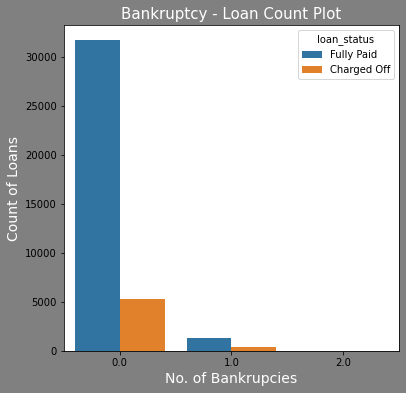

In [29]:
plt.figure(figsize=(6,6),facecolor='grey')

gradeCountPlot = sns.countplot(x = 'pub_rec_bankruptcies', data=cleanData, hue='loan_status')
gradeCountPlot.set_title('Bankruptcy - Loan Count Plot',fontsize=15,color='w')
gradeCountPlot.set_xlabel('No. of Bankrupcies',fontsize=14,color='w')
gradeCountPlot.set_ylabel('Count of Loans',fontsize=14,color='w')

plt.show()


#### Insights:
There are hardly any loan given to people with declared bankruptcies.  

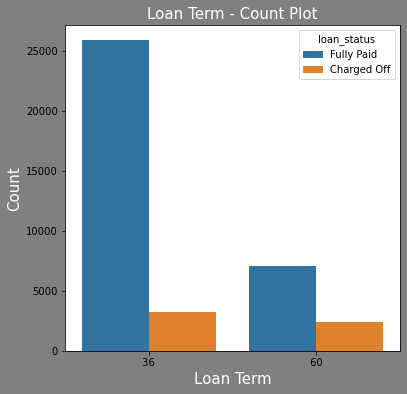

In [30]:
#Analysis of Loan term with loan status

plt.figure(figsize=(6,6),facecolor='grey')

loanTermPlot = sns.countplot(x = 'term', data=cleanData, hue='loan_status')
loanTermPlot.set_title('Loan Term - Count Plot',fontsize=15,color='w')
loanTermPlot.set_xlabel('Loan Term',fontsize=15,color='w')
loanTermPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


#### Insights:
rate of defaults are significantly higher for shorter 60 month loan terms

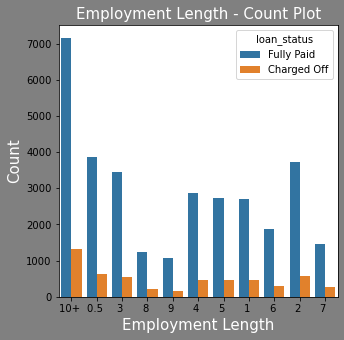

In [31]:
#Analysis of Employmnet duration with Loan status

plt.figure(figsize=(5,5),facecolor='grey')

empCountPlot = sns.countplot(x = 'emp_length', data=cleanData, hue='loan_status')
empCountPlot.set_title('Employment Length - Count Plot',fontsize=15,color='w')
empCountPlot.set_xlabel('Employment Length',fontsize=15,color='w')
empCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


#### Insights:
Rate of defulat is clearly lower for people with 10+ years of employment, whereas it is higher for 0-5 years range

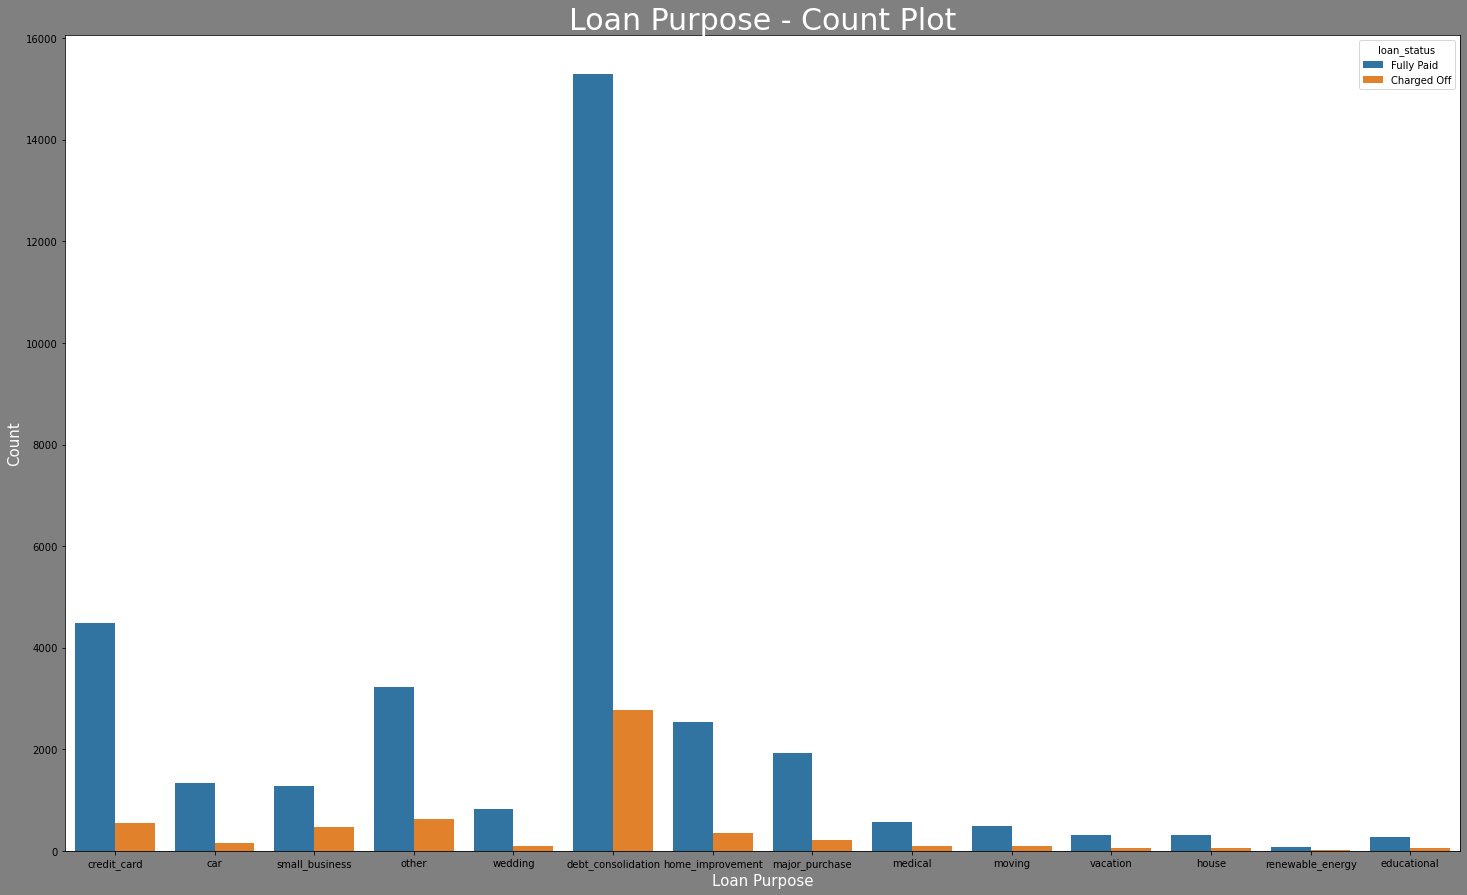

In [32]:
# Loan purpose analysis with loan status

plt.figure(figsize=(25,15),facecolor='grey')

purposePlot = sns.countplot(x = 'purpose', data=cleanData, hue='loan_status')
purposePlot.set_title('Loan Purpose - Count Plot',fontsize=30,color='w')
purposePlot.set_xlabel('Loan Purpose',fontsize=15,color='w')
purposePlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


#### Insights:
Most of the loans are for direct Debt consolidation or indirect debt conslidation (Credit_card)

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

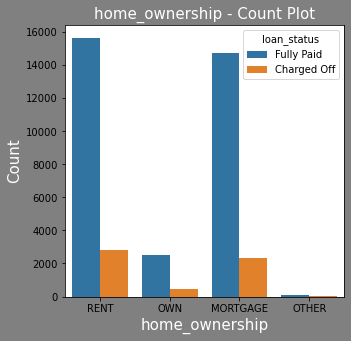

In [33]:
#Lets analyze the relation between home ownership and loan status

plt.figure(figsize=(5,5),facecolor='grey')

home_ownershipPlot = sns.countplot(x = 'home_ownership', data=cleanData, hue='loan_status')
home_ownershipPlot.set_title('home_ownership - Count Plot',fontsize=15,color='w')
home_ownershipPlot.set_xlabel('home_ownership',fontsize=15,color='w')
home_ownershipPlot.set_ylabel('Count',fontsize=15,color='w')

cleanData['home_ownership'].value_counts()
cleanData['home_ownership'].value_counts()

#### Insights:
Peple who live on rent and mortgages are are likely to apply and get loans (approx 90% of all loans) whereas very few home owners apply for or get the loans

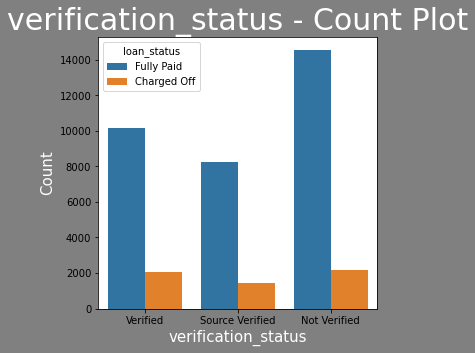

In [34]:
# Loan purpose analysis with loan status

plt.figure(figsize=(5,5),facecolor='grey')

verification_statusPlot = sns.countplot(x = 'verification_status', data=cleanData, hue='loan_status')
verification_statusPlot.set_title('verification_status - Count Plot',fontsize=30,color='w')
verification_statusPlot.set_xlabel('verification_status',fontsize=15,color='w')
verification_statusPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


# Bivariate analysis

Text(0, 0.5, 'loan_amnt')

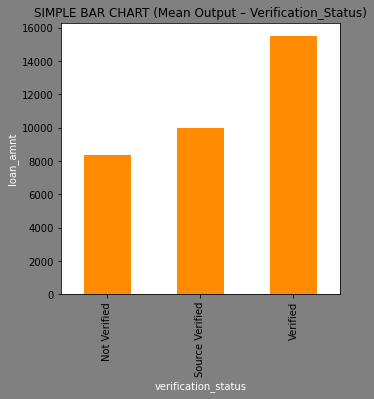

In [35]:
## Checking the portion of money invested based on customer verification status.

Bar1 = cleanData.groupby('verification_status')['loan_amnt'].mean()
Bar1

plt.figure(figsize=(5,5),facecolor='grey');
Bar1.plot.bar(title='SIMPLE BAR CHART (Mean Output – Verification_Status)', color='darkorange'); plt.xlabel('verification_status',color='w'); plt.ylabel('loan_amnt',color='w')



#### Insight

The above bar chart shows comparison between 'Not Verified' & 'Verified', the risk portion has been balanced and the verified applicants get signficantly higher avg loan value then not verfied. 

# Below Multiple Bar Chart has Loan distribution with home ownership vs experience.
## 1. The loan distribution is higher on people with Mortage, high risk.
### - Customer with existing obligation(Mortage), it puts additional burden to customer during repay.
## 2. Instead, we see there a huge opportunity space available on people with Own property.
### - They are always reachable as their properly state is stable.

Text(0, 0.5, 'emp_length')

<Figure size 1440x1440 with 0 Axes>

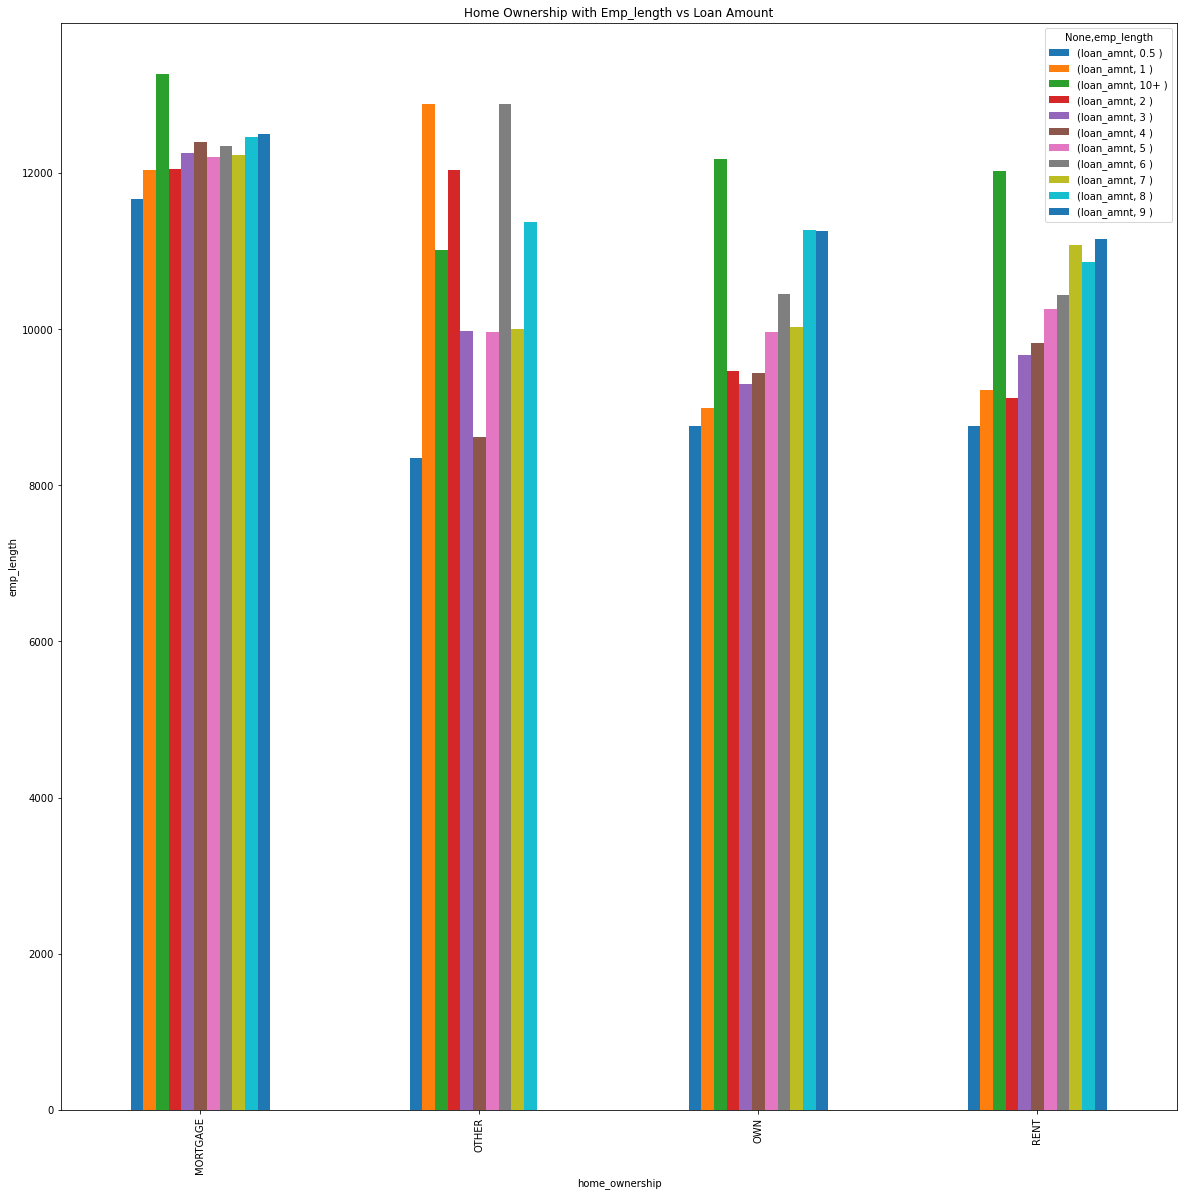

In [36]:
Bar2=pd.pivot_table(cleanData, index=['home_ownership'], columns=['emp_length'], values=['loan_amnt'], aggfunc='mean')
Bar2

plt.figure(figsize=(20,20),facecolor='grey'); Bar2.plot.bar(title='Home Ownership with Emp_length vs Loan Amount'); plt.xlabel('home_ownership'); plt.ylabel('emp_length')

# Geo Distribution of states shows, the majority of customers are in CA and organization should consider expanding in other states.

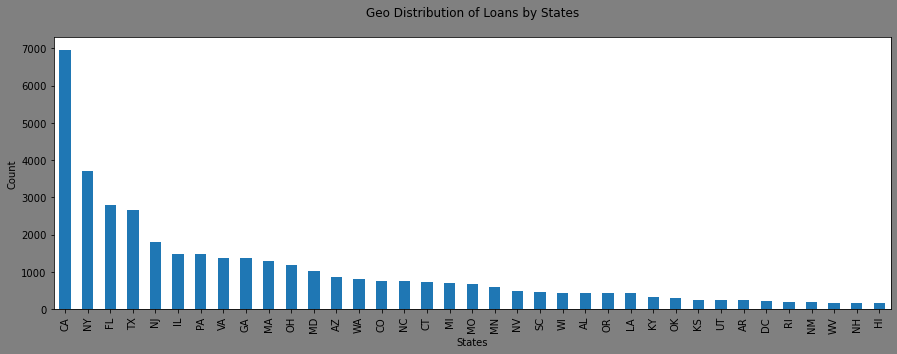

Text(0, 0.5, 'Annual Income')

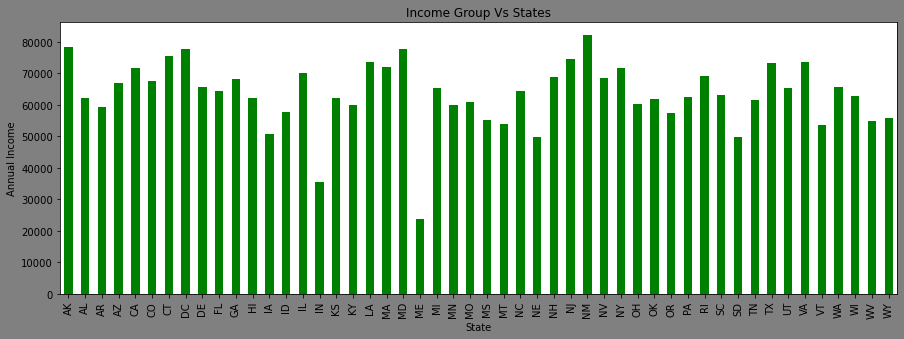

In [37]:
# Creating bar chart with status wise distribution

cleanData["addr_state"].value_counts().describe()
plt.figure(figsize = (15,5),facecolor='grey')

cleanData["addr_state"].value_counts()[cleanData["addr_state"].value_counts() > 117].plot.bar(align='center')

# Adding title & Axies
plt.title("Geo Distribution of Loans by States\n")
plt.xlabel("States")
plt.ylabel("Count")

plt.show()

## Checking the opportunity available in other states by income group

Bar3 = cleanData.groupby('addr_state')['annual_inc'].mean()
Bar3

plt.figure(figsize=(15,5),facecolor='grey'); Bar3.plot.bar(title='Income Group Vs States', color='green'); plt.xlabel('State'); plt.ylabel('Annual Income') 


### Insights
In Below chart, Risk proportion is visible as below
 Loan for Car should be increased as it very less risky investment since car would be collateral.

 - CreditCard & DebtConsolidation, it should consider high risk as it indicates poor financial handling of the customer.

 - House should targeted as high as RenewalEnergy as collateral would be there.

 - Wedding & Medical should be considered high risk as there is no collateral in both and In Medical, if customer is taking treatment for self, there is high possibility of delay\drop in repay.

Text(0, 0.5, 'Amount Invested')

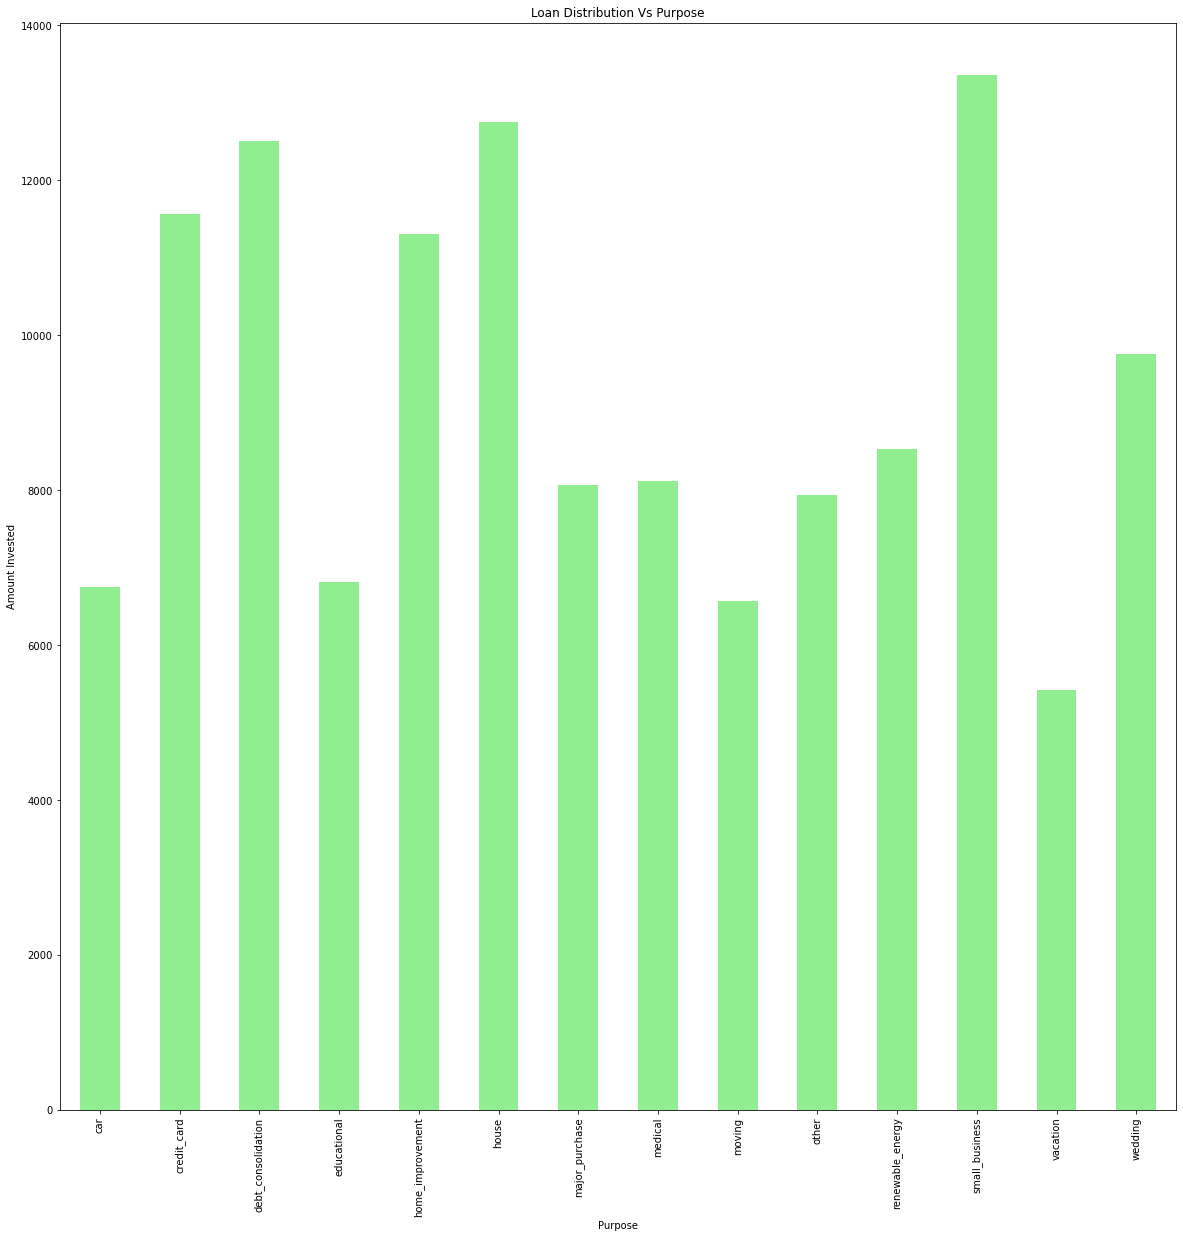

In [38]:
## Checking the portion of money invested based on customer verification status.

Bar4 = cleanData.groupby('purpose')['loan_amnt'].mean()
Bar4

plt.figure(); Bar4.plot.bar(title='Loan Distribution Vs Purpose', color='lightgreen'); plt.xlabel('Purpose'); plt.ylabel('Amount Invested') 


# Below Box Plot helps us comparing the historial data with current

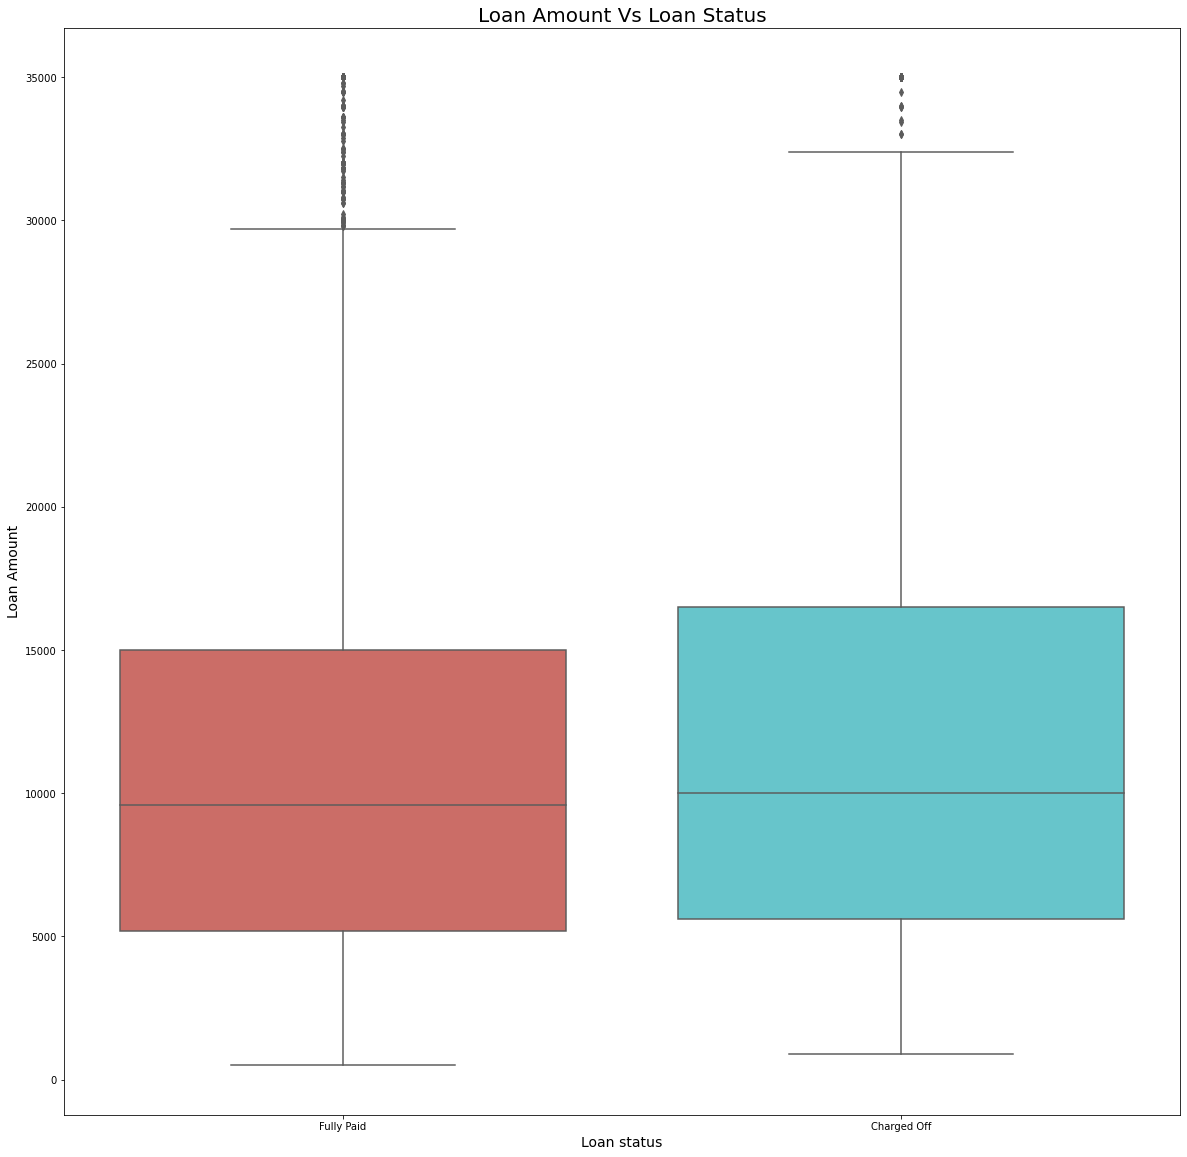

In [44]:
sns.boxplot(x="loan_status",y="loan_amnt", data=cleanData,palette="hls")
plt.xlabel("Loan status", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount Vs Loan Status", fontsize=20)

plt.show()

# Below comparision help us undertand folloings:

 1. People with Own homes like to default very less.
 
 2. People with Rent are high on risk.
 
 3. Sales focus should be more on people with Property own followed by Mortages
 
 4. Multiple sales techniques like lower interest rate for people with own property to increase the loan distrubution in this section.

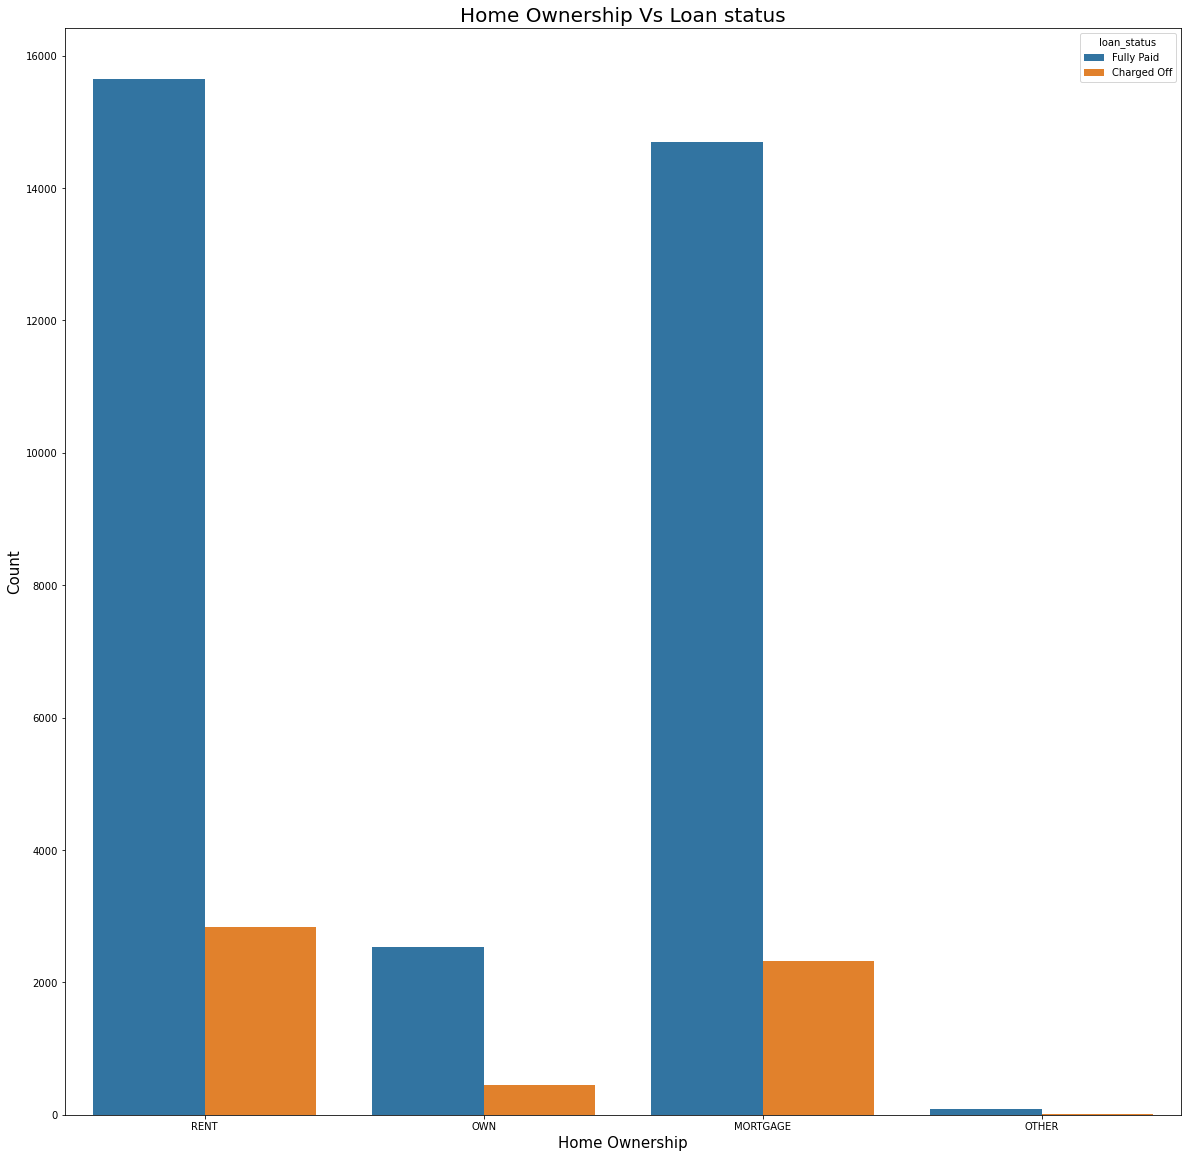

In [43]:
sns.countplot(x="home_ownership" ,data=cleanData, hue="loan_status")
plt.xlabel("Home Ownership", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Home Ownership Vs Loan status", fontsize=20)
plt.show()

# Stacked Bar Chart shows comparison of experience aginst Loan status
## It indicates the default percentage ranges around 15% on all experience buckets.

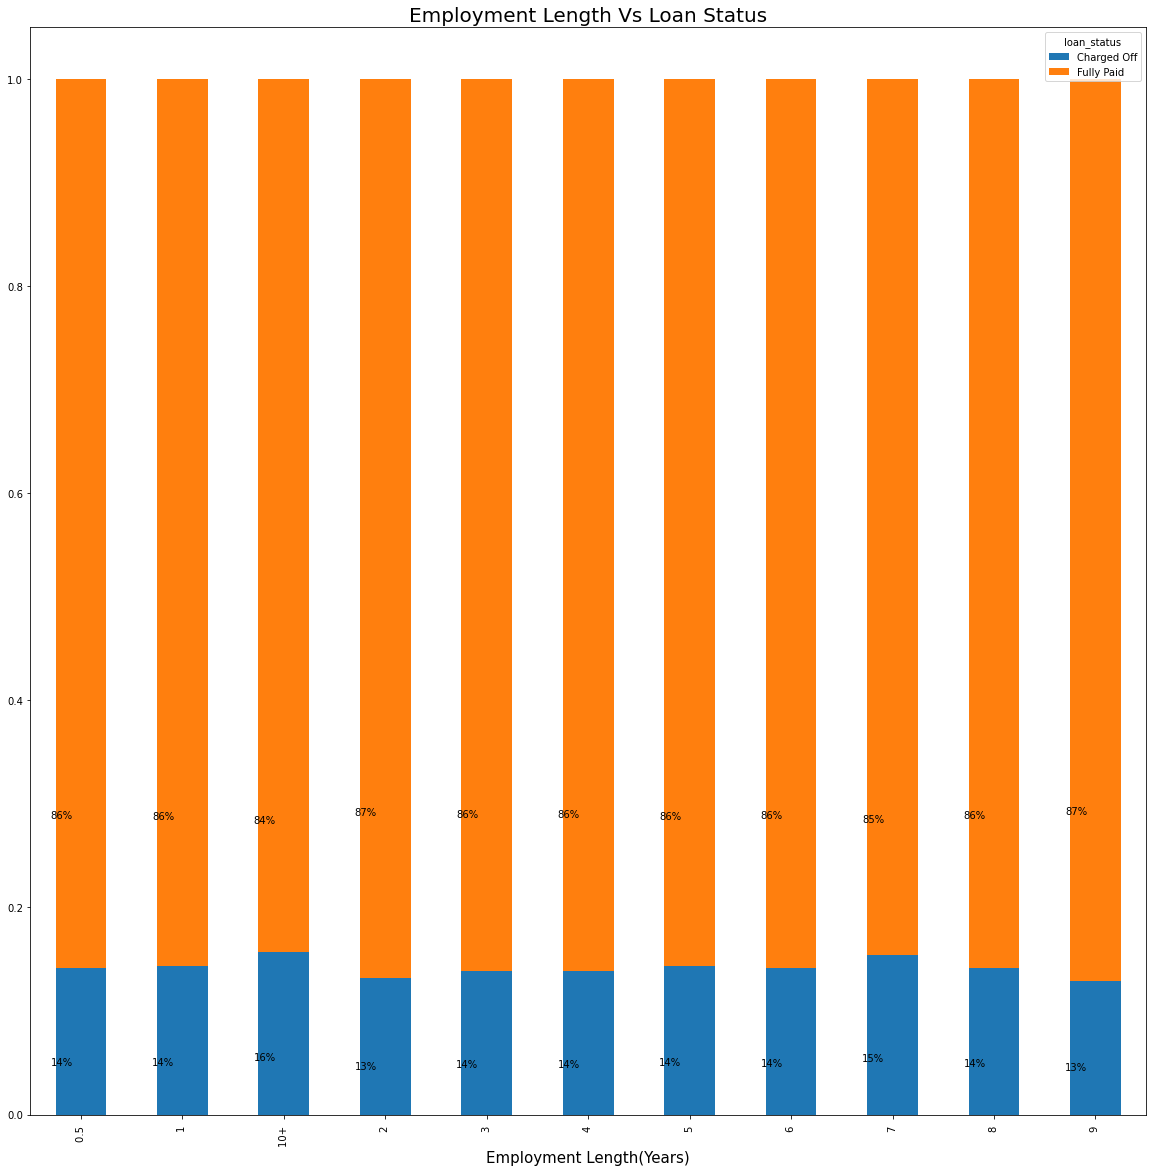

In [42]:
Stack2 = pd.crosstab(index=cleanData['emp_length'], columns=cleanData['loan_status'], normalize=0).reset_index()
#create stacked bar chart

axes = Stack2.set_index('emp_length').plot(kind='bar', stacked=True,)

# extract the figure object
fig = axes.get_figure()

for idx, row in Stack2.iterrows():
    plt.text(idx-.3, row['Charged Off']/3, "{:.0%}".format(row['Charged Off']))
for idx, row in Stack2.iterrows():
    plt.text(idx-.3, row['Fully Paid']/3, "{:.0%}".format(row['Fully Paid']))  
    
#fig.set_size_inches((16, 6))
plt.xlabel("Employment Length(Years)", fontsize=15)
plt.title("Employment Length Vs Loan Status", fontsize=20)
plt.show()